In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Name of the CSV file
file = '../ignore/US_Accidents_May19.csv'
df = pd.read_csv(file)

# Name of the CSV file
file1 = '../ignore/TMC_decoding.csv'
TMC_decoding = pd.read_csv(file1)

# Name of the CSV file
file2 = '../ignore/denver_weather_num_days.csv'
denver_weather_days = pd.read_csv(file2)
denver_weather_days.set_index('weather_denver', inplace = True)

In [3]:
# Setting to show all the rows
pd.set_option('display.max_rows', None)

In [4]:
# Display first 5 rows of Data
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
# Different TMCs - maybe add the description of each of them?
df['TMC'].unique()

array([201., 241., 247., 246., 341., 406., 245., 248., 200., 244., 203.,
       229., 222., 202., 206., 343., 236., 239., 336., 339., 351.,  nan])

In [6]:
# Count of different severity accidents (4 - strongest, 0 - lightest)
df['Severity'].value_counts()

2    1455524
3     715582
4      72002
1        814
0         17
Name: Severity, dtype: int64

In [7]:
df['Start_Time'].min()

'2015-03-09 07:00:00'

In [8]:
# Shows that we can use the normal sunrise_sunset column. 
# It is the most "powerful" connection to the other columns.
grouped_day_night = df.groupby(['Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])['ID'].count()
grouped_day_night_df = pd.DataFrame({"Count": grouped_day_night})
grouped_day_night_df['Percent'] = grouped_day_night_df['Count'] / grouped_day_night_df['Count'].sum()
grouped_day_night_df

Count  \
Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight            
Day            Day            Day               Day                    1645074   
                                                Night                     2223   
               Night          Day               Day                         27   
                                                Night                        7   
Night          Day            Day               Day                     113990   
                                                Night                      103   
               Night          Day               Day                     113424   
                                                Night                       94   
                              Night             Day                      87277   
                                                Night                   281642   

                                                                        Percent  
Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight            
Day            Day            Day               Day                    0.733144  
                                                Night                  0.000991  
               Night          Day               Day                    0.000012  
                                                Night                  0.000003  
Night          Day            Day               Day                    0.050801  
                                                Night                  0.000046  
               Night          Day               Day                    0.050549  
                                                Night                  0.000042  
                              Night             Day                    0.038896  
                                                Night                  0.125517

In [9]:
# Example of mismatch between the Day/Night columns
df.loc[(df['Sunrise_Sunset'] == 'Day') & (df['Civil_Twilight'] == 'Night') & (df['Astronomical_Twilight'] == 'Night')]

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
995709,A-995710,MapQuest,241.0,2,2018-07-01 09:57:25,2018-07-01 10:42:02,48.891541,-122.485542,NaN,NaN,...,False,False,False,False,False,False,Day,Night,Day,Night
1079177,A-1079178,MapQuest-Bing,241.0,2,2018-06-15 10:45:53,2018-06-15 11:15:28,48.833344,-122.485939,NaN,NaN,...,False,False,False,False,True,False,Day,Night,Day,Night
1083286,A-1083287,MapQuest,241.0,2,2018-06-18 12:49:53,2018-06-18 13:49:39,48.746143,-122.406197,NaN,NaN,...,False,False,False,False,False,False,Day,Night,Day,Night
1085700,A-1085701,MapQuest,201.0,2,2018-06-19 07:57:20,2018-06-19 08:27:08,48.846546,-122.555359,NaN,NaN,...,False,False,False,False,False,False,Day,Night,Day,Night
1094114,A-1094115,MapQuest,241.0,3,2018-06-24 10:37:58,2018-06-24 11:22:33,48.744965,-122.466347,NaN,NaN,...,False,False,False,False,False,False,Day,Night,Day,Night
1951633,A-1951634,Bing,NaN,2,2017-06-14 12:36:25,2017-06-14 18:36:25,48.922416,-122.485660,48.922422,-122.48566,...,False,False,False,False,False,False,Day,Night,Day,Night
2114515,A-2114516,Bing,NaN,4,2018-06-18 06:52:00,2018-06-18 12:52:00,48.813900,-122.544720,48.820430,-122.55104,...,False,False,False,False,False,False,Day,Night,Day,Night


In [10]:
# Unique values for Description - space for tighter clusters?
df['Description'].value_counts().head(10)

At I-5 - Accident.                                   467
At I-605 - Accident.                                 445
At I-405/San Diego Fwy - Accident.                   396
At I-15 - Accident.                                  367
At I-85 - Accident.                                  343
At Central Ave - Accident.                           324
At Grand Ave - Accident.                             320
At Main St - Accident.                               260
Accident on I-85 Southbound at Exit 54 Pelham Rd.    244
At I-405 - Accident.                                 238
Name: Description, dtype: int64

In [11]:
# Create relevant df with data for the weather comparison
df_weather = df[['ID', 'Severity', 'Start_Time', 'City', 'County', 'State', 'Timezone',
                 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
                 'Sunrise_Sunset']]

In [12]:
# Delete rows with Weather_Condition as null
# df_weather = df_weather.dropna(subset=['Weather_Condition'])

In [13]:
df_weather['Start_Time'].min()

'2015-03-09 07:00:00'

In [14]:
# Unique values for Weather Condition - space for tighter clusters
df_weather['Weather_Condition'].value_counts()

Clear                                  808182
Overcast                               382482
Mostly Cloudy                          310086
Partly Cloudy                          208371
Scattered Clouds                       204654
Light Rain                             107164
Light Snow                              36038
Haze                                    27727
Rain                                    24824
Fog                                     11617
Heavy Rain                               8929
Light Drizzle                            8058
Light Thunderstorms and Rain             4928
Thunderstorm                             4439
Snow                                     4099
Smoke                                    3010
Heavy Thunderstorms and Rain             2484
Thunderstorms and Rain                   2215
Light Freezing Rain                      1997
Mist                                     1918
Patches of Fog                           1878
Drizzle                           

In [15]:
df_weather['Weather_Condition_Corrected'] = df_weather['Weather_Condition']
df_weather['Weather_Condition_Corrected'] = df_weather['Weather_Condition_Corrected'].replace(
    {"Mostly Cloudy": "Cloudy",
     "Partly Cloudy": "Cloudy",
     "Scattered Clouds": "Cloudy",
     "Funnel Cloud": "Cloudy",
     'Overcast': 'Cloudy',
     'Drizzle': 'Rain',
     'Light Drizzle': 'Rain',
     'Light Freezing Drizzle': 'Rain',
     'Heavy Drizzle': 'Rain',
     'Heavy Freezing Drizzle': 'Rain',
     'Widespread Dust': 'Dust',
     'Dust Whirls': 'Dust',
     'Volcanic Ash': 'Dust',
     'Sand': 'Dust',
     'Blowing Sand': 'Dust',
     'Haze': 'Fog',
     'Patches of Fog': 'Fog',
     'Light Freezing Fog': 'Fog',
     'Shallow Fog': 'Fog',
     'Light Fog': 'Fog',
     'Mist': 'Fog',
     'Small Hail': 'Hail',
     'Light Hail': 'Hail',
     'Ice Pellets': 'Hail',
     'Light Haze': 'Fog',
     'Light Ice Pellets': 'Hail',
     'Heavy Ice Pellets': 'Hail',
     'Light Rain': 'Rain',
     'Heavy Rain': 'Rain',
     'Light Thunderstorms and Rain': 'Thunderstorm',
     'Heavy Thunderstorms and Rain': 'Thunderstorm',
     'Thunderstorms and Rain': 'Thunderstorm',
     'Light Freezing Rain': 'Rain',
     'Light Rain Showers': 'Rain',
     'Rain Showers': 'Rain',
     'Heavy Rain Showers': 'Rain',
     'Snow Grains': 'Snow',
     'Light Snow Grains': 'Snow',
     'Heavy Freezing Rain': 'Rain',
     'Heavy Smoke': 'Smoke',
     'Light Snow': 'Snow',
     'Heavy Snow': 'Snow',
     'Blowing Snow': 'Snow',
     'Light Snow Showers': 'Snow',
     'Light Thunderstorms and Snow': 'Snow',
     'Low Drifting Snow': 'Snow',
     'Heavy Thunderstorms and Snow': 'Snow',
     'Thunderstorms and Snow': 'Snow',
     'Heavy Blowing Snow': 'Snow',
     'Light Blowing Snow': 'Snow',
     'Snow Showers': 'Snow',
     'Heavy Thunderstorms with Small Hail': 'Thunderstorm',
     'Light Thunderstorm': 'Thunderstorm'
    })

df_weather['Weather_Condition_Corrected'].value_counts()

Cloudy          1105610
Clear            808182
Rain             153840
Fog               44996
Snow              41625
Thunderstorm      14076
Smoke              3011
Hail                397
Dust                172
Squalls              26
Name: Weather_Condition_Corrected, dtype: int64

In [16]:
df_weather["Start_Year"] = df_weather["Start_Time"].agg(lambda x: x.split("-")[0])

In [17]:
df_weather['Start_Year'].value_counts()

2018    892624
2017    717490
2016    410601
2019    223223
2015         1
Name: Start_Year, dtype: int64

In [18]:
# How many NaN per each column
df_weather.isnull().sum()

ID                                   0
Severity                             0
Start_Time                           0
City                                68
County                               0
State                                0
Timezone                          2141
Temperature(F)                   62265
Wind_Chill(F)                  1852370
Humidity(%)                      64467
Pressure(in)                     57280
Visibility(mi)                   71360
Wind_Direction                   47190
Wind_Speed(mph)                 442954
Precipitation(in)              1979466
Weather_Condition                72004
Sunrise_Sunset                      78
Weather_Condition_Corrected      72004
Start_Year                           0
dtype: int64

In [19]:
# Delete rows with 2019 data
df_weather.drop( df_weather[ df_weather['Start_Year'] == '2019' ].index , inplace=True)

In [20]:
# Unique values for State - space for tighter clusters?
df_weather['State'].value_counts()

CA    449909
TX    219354
FL    163442
NC     96474
NY     94858
SC     87707
PA     70294
MI     68341
IL     66430
GA     59914
VA     54256
WA     46682
OH     42632
AZ     37799
TN     37157
NJ     36937
LA     33501
MN     33208
MD     30878
OK     30815
OR     29690
MA     23668
CO     22536
IN     22272
MO     19886
NE     17863
CT     17349
AL     17134
UT     16772
KY     12291
WI     10696
RI      7509
IA      7503
NV      6521
KS      4892
NH      4847
MS      3975
NM      3404
DE      2813
DC      2168
WV      1801
ME      1429
ID      1206
AR       757
WY       380
VT       360
MT       347
SD        33
ND        26
Name: State, dtype: int64

In [21]:
# Create DataFrame to hold the data for chart Weather and Severity of Acidents
df_weather_severity = pd.DataFrame(df_weather.groupby(['Weather_Condition_Corrected','Severity','Start_Year'])['ID'].count().reset_index())



Text(0, 0.5, 'Severity of Accidents')

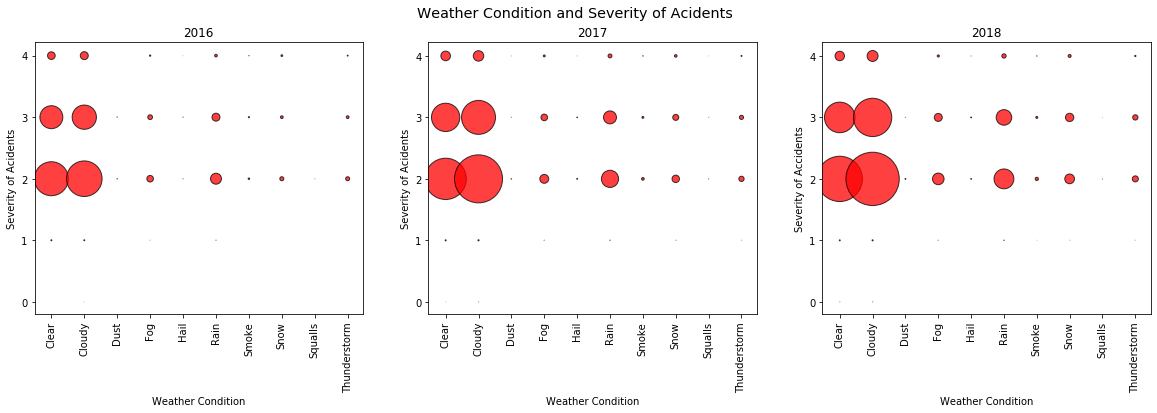

In [22]:
fig = plt.figure(figsize=(20,5))
st = fig.suptitle('Weather Condition and Severity of Acidents', fontsize="x-large")

# 2016 Chart
df_weather_severity_2016 = df_weather_severity.loc[df_weather_severity['Start_Year'] == '2016']

# List of values in x axis, y axis and dots sizes
x_axis_2016 = list(df_weather_severity_2016['Weather_Condition_Corrected'])
data_2016 = list(df_weather_severity_2016['Severity'])
size_2016 = [i / 100 for i in list(df_weather_severity_2016['ID'])]

# Create Chart
plt.subplot(1, 3, 1)
plt.scatter(x_axis_2016, data_2016, marker="o", facecolors="red", edgecolors="black",
            s=size_2016, alpha=0.75)
plt.yticks(np.arange(0, 5, 1))
plt.xticks(rotation="vertical")
plt.title("2016")
plt.xlabel("Weather Condition")
plt.ylabel("Severity of Acidents")


# 2017 Chart
df_weather_severity_2017 = df_weather_severity.loc[df_weather_severity['Start_Year'] == '2017']

# List of values in x axis, y axis and dots sizes
x_axis_2017 = list(df_weather_severity_2017['Weather_Condition_Corrected'])
data_2017 = list(df_weather_severity_2017['Severity'])
size_2017 = [i / 100 for i in list(df_weather_severity_2017['ID'])]

# Create Chart
plt.subplot(1, 3, 2)
plt.scatter(x_axis_2017, data_2017, marker="o", facecolors="red", edgecolors="black",
            s=size_2017, alpha=0.75)
plt.yticks(np.arange(0, 5, 1))
plt.xticks(rotation="vertical")
plt.title("2017")
plt.xlabel("Weather Condition")
plt.ylabel("Severity of Acidents")

# 2018 Chart
df_weather_severity_2018 = df_weather_severity.loc[df_weather_severity['Start_Year'] == '2018']

# List of values in x axis, y axis and dots sizes
x_axis_2018 = list(df_weather_severity_2018['Weather_Condition_Corrected'])
data_2018 = list(df_weather_severity_2018['Severity'])
size_2018 = [i / 100 for i in list(df_weather_severity_2018['ID'])]

# Create Chart
plt.subplot(1, 3, 3)
plt.scatter(x_axis_2018, data_2018, marker="o", facecolors="red", edgecolors="black",
            s=size_2018, alpha=0.75)
plt.yticks(np.arange(0, 5, 1))
plt.xticks(rotation="vertical")
plt.title("2018")
plt.xlabel("Weather Condition")
plt.ylabel("Severity of Accidents")

In [25]:
df_weather_denver = df_weather[df_weather['City'] == 'Denver']
df_weather_denver['Weather_Condition_Corrected2'] = df_weather_denver['Weather_Condition_Corrected']
df_weather_denver['Weather_Condition_Corrected2'] = df_weather_denver['Weather_Condition_Corrected2'].replace(
    {"Clear": "Clear/Cloudy",
     "Cloudy": "Clear/Cloudy"})
df_weather_denver = pd.DataFrame(df_weather_denver.groupby(['Weather_Condition_Corrected2',
                                                            'Start_Year'])['ID'].count().reset_index())
df_weather_denver_trans = df_weather_denver.pivot_table(index=('Weather_Condition_Corrected2'), 
                                                        columns='Start_Year', values='ID')
df_weather_denver_trans

Start_Year,2016,2017,2018
Weather_Condition_Corrected2,,,
Clear/Cloudy,448.0,2512.0,5473.0
Fog,5.0,48.0,53.0
Rain,8.0,108.0,126.0
Smoke,NaN,8.0,4.0
Snow,NaN,113.0,172.0
Thunderstorm,3.0,6.0,4.0


In [26]:
df_weather_denver_trans_norm = df_weather_denver_trans.div(denver_weather_days, axis = 0)
df_weather_denver_trans_norm

Start_Year,2016,2017,2018
Clear/Cloudy,2.715152,16.206452,36.979730
Dust,NaN,NaN,NaN
Fog,0.080645,0.676056,0.688312
Hail,NaN,NaN,NaN
Rain,0.156863,1.741935,2.377358
Smoke,NaN,1.142857,0.500000
Snow,NaN,9.416667,8.600000
Thunderstorm,0.049180,0.109091,0.072727


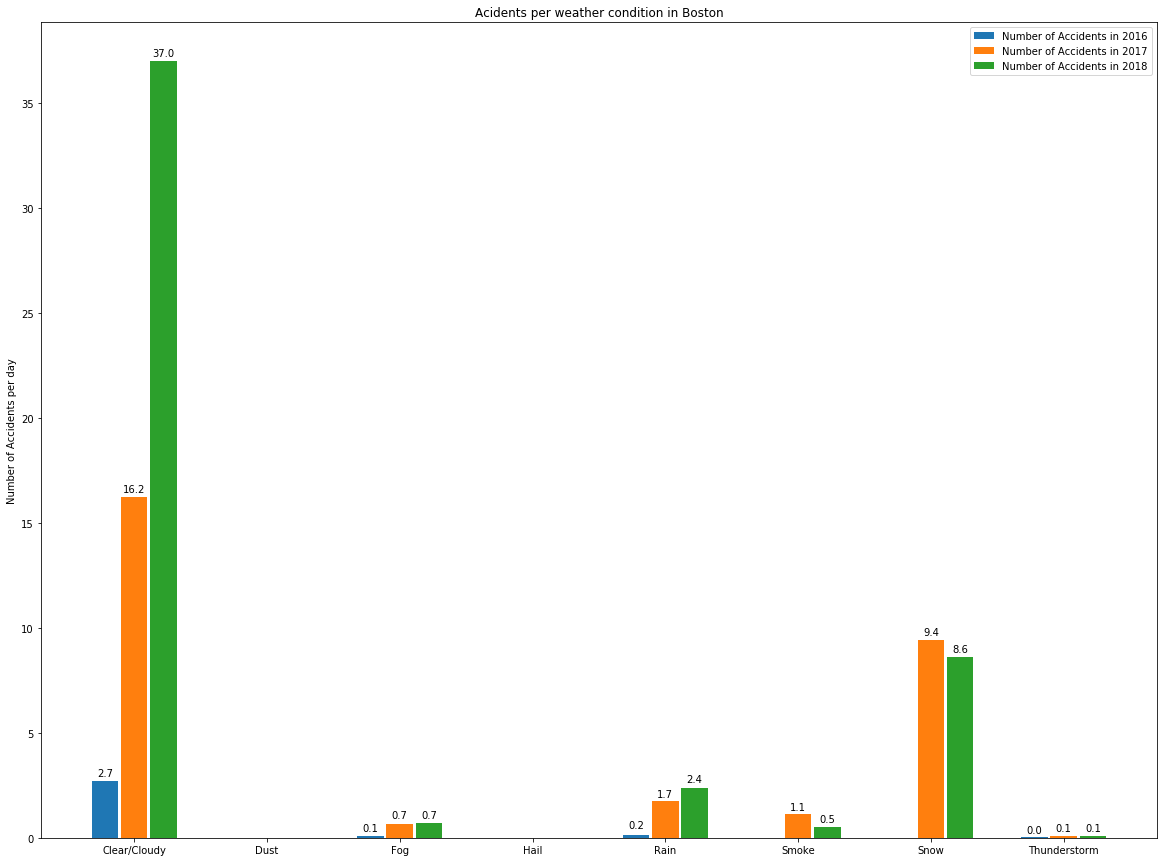

In [27]:
width = 0.2  # the width of the bars
x = np.arange(len(df_weather_denver_trans_norm.index))  # the label locations
labels = df_weather_denver_trans_norm.index

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, list(df_weather_denver_trans_norm['2016']), width, label='Number of Accidents in 2016')
rects2 = ax.bar(x, list(df_weather_denver_trans_norm['2017']), width, label='Number of Accidents in 2017')
rects3 = ax.bar(x + width*1.1, list(df_weather_denver_trans_norm['2018']), width, label='Number of Accidents in 2018')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents per day')
ax.set_title('Acidents per weather condition in Boston')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height().round(1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

In [23]:
# Create DataFrame to hold the data for chart Day/Night and Severity of Acidents
df_dn_severity = pd.DataFrame(df_weather.groupby(['Sunrise_Sunset','Start_Year'])['ID'].count().reset_index())
df_dn_severity = df_dn_severity.pivot(index='Sunrise_Sunset', columns = 'Start_Year', values = 'ID')


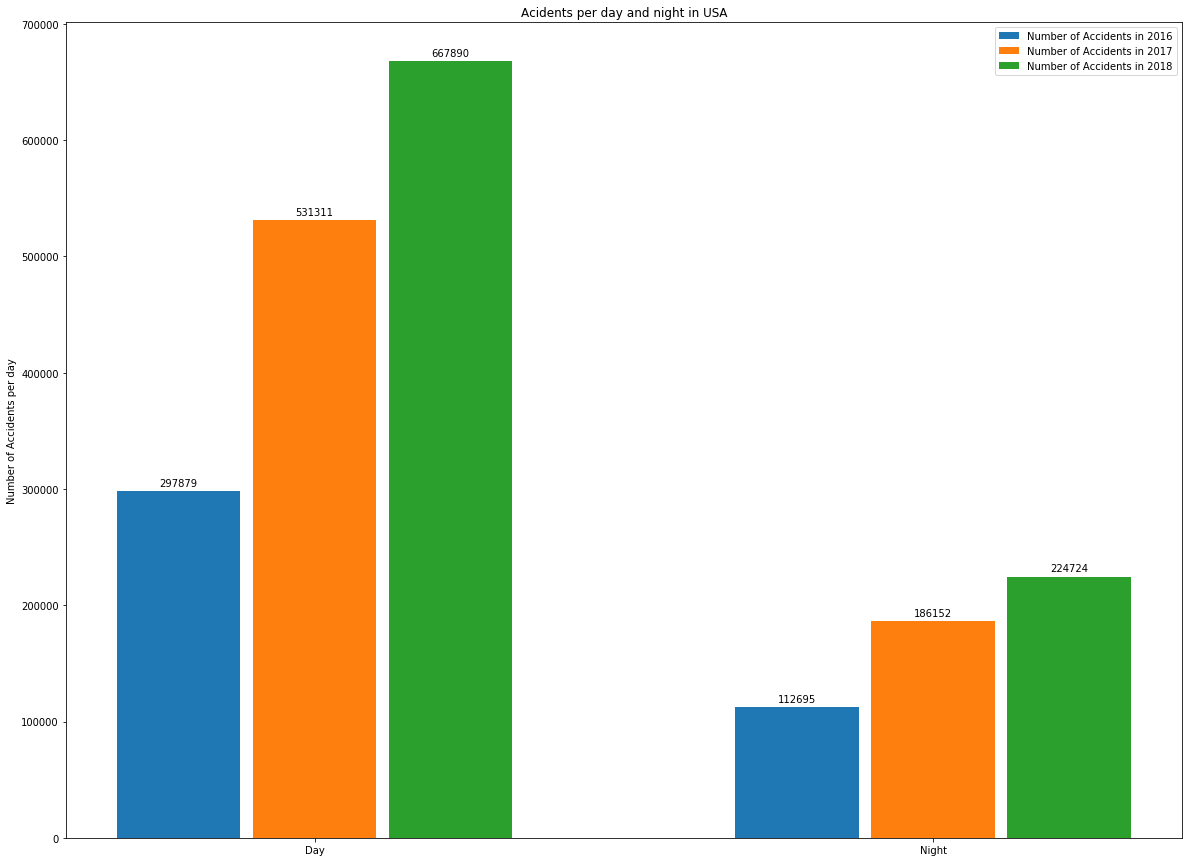

In [37]:
width = 0.2  # the width of the bars
x = np.arange(len(df_dn_severity.index))  # the label locations
labels = list(df_dn_severity.index)

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, list(df_dn_severity['2016']), width, label='Number of Accidents in 2016')
rects2 = ax.bar(x, list(df_dn_severity['2017']), width, label='Number of Accidents in 2017')
rects3 = ax.bar(x + width*1.1, list(df_dn_severity['2018']), width, label='Number of Accidents in 2018')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents per day')
ax.set_title('Acidents per day and night in USA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height().round(1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

In [32]:
# Create DataFrame to hold the data for chart Day/Night per US state
df_dn = pd.DataFrame(df_weather.groupby(['Sunrise_Sunset','Start_Year', 'State'])['ID'].count().reset_index())
df_dn = df_dn.pivot_table(index=('Start_Year','State'), columns = 'Sunrise_Sunset', values = 'ID').reset_index()
df_dn['Day/Night'] = df_dn['Day'] / df_dn['Night']
df_dn

Sunrise_Sunset,Start_Year,State,Day,Night,Day/Night
0,2016,AL,112.0,23.0,4.869565
1,2016,AR,25.0,1.0,25.000000
2,2016,AZ,1946.0,824.0,2.361650
3,2016,CA,95343.0,45111.0,2.113520
4,2016,CO,964.0,360.0,2.677778
5,2016,CT,3261.0,940.0,3.469149
6,2016,DC,318.0,135.0,2.355556
7,2016,DE,189.0,90.0,2.100000
8,2016,FL,29021.0,8000.0,3.627625
9,2016,GA,9835.0,3407.0,2.886704


In [33]:
df_dn['Text'] = 'Year ' + df_dn['Start_Year'].astype(str) + '<br>' +\
'Accidents during the day: ' + df_dn['Day'].astype(str) + "<br>" +\
'Accidents during the night: ' + df_dn['Night'].astype(str) + '<br>' +\
'State: ' + df_dn['State']



In [42]:
df_dn_2018 = df_dn[df_dn['Start_Year'] == '2018']


# source for the charts: https://plot.ly/python/choropleth-maps/
fig = go.Figure(data=go.Choropleth(locations = df_dn_2018['State'], # Spatial coordinates
    z = df_dn_2018['Day/Night'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = 'Number of Acidents Day vs. Night',
    text=df_dn_2018['Text'],
))

fig.update_layout(
    title_text = 'Number of Acidents During the Day vs During the Night in 2018',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [35]:
df_dn_2017 = df_dn[df_dn['Start_Year'] == '2017']

fig = go.Figure(data=go.Choropleth(locations = df_dn_2017['State'], # Spatial coordinates
    z = df_dn_2017['Day/Night'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = 'Number of Acidents Day vs. Night',
    text=df_dn_2017['Text'],
))

fig.update_layout(
    title_text = 'Number of Acidents During the Day vs During the Night in 2017',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [36]:
df_dn_2016 = df_dn[df_dn['Start_Year'] == '2016']

fig = go.Figure(data=go.Choropleth(locations = df_dn_2016['State'], # Spatial coordinates
    z = df_dn_2016['Day/Night'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = 'Number of Acidents Day vs. Night',
    text=df_dn_2016['Text'],
))

fig.update_layout(
    title_text = 'Number of Acidents During the Day vs During the Night in 2016',
    geo_scope='usa', # limite map scope to USA
)

fig.show()